In [ ]:
pip install jyquickhelper

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
# # --- Installing Libraries ---
!pip install pandas-profiling==3.2.0
!pip install pywaffle

In [ ]:
pip install dataframe_image

In [ ]:
import os
import pandas as pd
import numpy as np
import datetime, time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# !pip install dataframe_to_image
import dataframe_image as dfi

# date
from datetime import time
import phik

from lightgbm import LGBMClassifier

# Plotly
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Suppress FutureWarnings related to is_categorical_dtype
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


class clr:
    start = '\033[93m' + '\033[1m'
    color = '\033[93m'
    end = '\033[0m'

In [ ]:
#from google.colab import drive

# Monter Google Drive à l'emplacement par défaut
#drive.mount("/content/drive", force_remount=True)

In [ ]:
%env GOOGLE_COLAB_AUTH_INTEGRATED=True

env: GOOGLE_COLAB_AUTH_INTEGRATED=True


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os

# Spécifiez le chemin du sous-répertoire
#sous_repertoire = '/content/drive/MyDrive/OC-Projet-7'
#os.makedirs(sous_repertoire)


In [ ]:
import sys
def is_colab_environment():
    # Vérifier si le module 'google.colab' est présent dans la liste des modules importés
    return 'google.colab' in sys.modules

# Exemple d'utilisation
if is_colab_environment():
    print("Le code s'exécute dans l'environnement Google Colab.")
else:
    print("Le code s'exécute dans un environnement local.")

if is_colab_environment():
    from google.colab import drive
    drive.mount('/content/drive')

Le code s'exécute dans l'environnement Google Colab.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/OC-Projet-7')

from function_EDA import *

Le code s'exécute dans l'environnement Google Colab.


In [ ]:
# # Configuration des chemins de dossiers pour les différents environnements
if not is_colab_environment():
  PROJ_FOLDER   =  '/content/drive/MyDrive/OC-Projet-7'
  DATA_FOLDER   =  os_path_join(PROJ_FOLDER,'bases')
  OUT_FOLDER    =  os_path_join(PROJ_FOLDER,'out_put')
  GRAPH_FOLDER  =  os_path_join(PROJ_FOLDER,'Graphs') # graphique pour les diapos


# # Définition des chemins de dossiers pour l'environnement Colab

if is_colab_environment():
     # Colaboratory - décommentez les 2 lignes suivantes pour connecter à votre drive
#     # from google.colab import drive
#     # drive.mount('/content/drive')
  PROJ_FOLDER   = '/content/drive/MyDrive/OC-Projet-7'
  DATA_FOLDER   =  os_path_join(PROJ_FOLDER,'bases')
  OUT_FOLDER    =  os_path_join(PROJ_FOLDER,'out_put')
  GRAPH_FOLDER  =  os_path_join(PROJ_FOLDER,'Graphs') # graphique pour les diapos


# SAVE_IMAGES = True
# # imgPath = f'{DATA_FOLDER}/Graphs'
# # if not os.path.exists(imgPath[:-1]):
# #     os.makedirs(imgPath[:-1])

# Crée les dossiers spécifiés s'ils n'existent pas déjà
os_make_dir(OUT_FOLDER)
os_make_dir(DATA_FOLDER)
os_make_dir(GRAPH_FOLDER)  # graphique pour les diapos
imgPath=f'{GRAPH_FOLDER}/'
print(GRAPH_FOLDER)



/content/drive/MyDrive/OC-Projet-7/Graphs


In [ ]:
# Données nettoyés (OUT_FOLDER)
CLEAN_DATA_FILENAME = 'cleaned_data_scoring.csv'
CLEAN_DATA_SAMPLE   = 'cleaned_data_sample.csv'  # 100,000 registres
CLEAN_DATA_TRAIN    = 'cleaned_data_train.csv'
CLEAN_DATA_TEST     = 'cleaned_data_test.csv'
CLEAN_DATA_FEATURES = 'cleaned_data_features.csv'  # 100 meilleur features
SAMPLE_SIZE         = 10000

In [ ]:
DATA_FOLDER

'/content/drive/MyDrive/OC-Projet-7/bases'

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
# Chemin du dossier contenant les fichiers
DATA_FOLDER = '/content/drive/MyDrive/dossier_proje7/OC-Projet-7/bases'

def list_files_and_sizes(folder):
    files_list = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        # Ignorer les sous-dossiers
        if os.path.isfile(filepath):
            size = os.path.getsize(filepath) / (1024 * 1024)  # Convertir la taille en Mo
            files_list.append((filename, f"{size:.2f} Mo"))
    return files_list

# Liste des fichiers et de leurs tailles dans le dossier
bases_list = list_files_and_sizes(DATA_FOLDER)
print(bases_list)

# Lire les fichiers CSV dans des DataFrames
dataframes = {}
for filename, _ in bases_list:
    file_path = os.path.join(DATA_FOLDER, filename)
    dataframe_name = os.path.splitext(filename)[0]  # Utiliser le nom du fichier sans extension comme clé
    dataframes[dataframe_name] = pd.read_csv(file_path, encoding='latin1')  # Spécifier l'encodage ici

# Exemple : accéder à un DataFrame particulier
application_train_df = dataframes['application_train']
print(application_train_df.head())


[('HomeCredit_columns_description.csv', '0.04 Mo'), ('sample_submission.csv', '0.51 Mo'), ('application_test.csv', '25.34 Mo'), ('application_train.csv', '158.44 Mo'), ('bureau.csv', '162.14 Mo'), ('bureau_balance.csv', '358.19 Mo'), ('POS_CASH_balance.csv', '374.51 Mo'), ('previous_application.csv', '386.21 Mo'), ('installments_payments.csv', '689.62 Mo'), ('credit_card_balance.csv', '333.00 Mo')]
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N          

In [ ]:
bases_list=list_files_and_sizes(DATA_FOLDER)
bases_list

[('HomeCredit_columns_description.csv', '0.04 Mo'),
 ('sample_submission.csv', '0.51 Mo'),
 ('application_test.csv', '25.34 Mo'),
 ('application_train.csv', '158.44 Mo'),
 ('bureau.csv', '162.14 Mo'),
 ('bureau_balance.csv', '358.19 Mo'),
 ('POS_CASH_balance.csv', '374.51 Mo'),
 ('previous_application.csv', '386.21 Mo'),
 ('installments_payments.csv', '689.62 Mo'),
 ('credit_card_balance.csv', '333.00 Mo')]

In [ ]:
import chardet
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

def get_dataframe_name(df):
    name = [x for x in globals() if globals()[x] is df]
    return name[0]


def namestr(df, namespace=globals()):
    name = [name for name in namespace if namespace[name] is df]
    return name[0] if name else None  # Return the first name or None if not found

In [ ]:
from tqdm import tqdm

def load_csv_files_as_dataframes(directory_path):
    dataframes={}
    listedf=[]
    with tqdm(total=len(os.listdir(directory_path)), desc='Chargement...', unit='file') as pbar:
        for r, filename in enumerate(os.listdir(directory_path)):
            # print(r)
            if filename.endswith(".csv"):
                csv_path = os.path.join(directory_path, filename)
                df_name = os.path.splitext(filename)[0]  # Nom du dataframe (sans extension)
                listedf.append(df_name)
                encoding = detect_encoding(csv_path)
                globals()[df_name] = pd.read_csv(csv_path, encoding=encoding)  # Charger le fichier CSV en tant que dataframe
                dataframes[df_name] = globals()[df_name]
                pbar.update(1)

    return dataframes, listedf

In [ ]:
datasets, titles=load_csv_files_as_dataframes(DATA_FOLDER)

Chargement...: 100%|██████████| 10/10 [31:14<00:00, 187.49s/file]


In [ ]:
titles

['HomeCredit_columns_description',
 'sample_submission',
 'application_test',
 'application_train',
 'bureau',
 'bureau_balance',
 'POS_CASH_balance',
 'previous_application',
 'installments_payments',
 'credit_card_balance']

In [ ]:
datasets=[application_test, application_train, bureau, bureau_balance, credit_card_balance,
          HomeCredit_columns_description, installments_payments, POS_CASH_balance,
          previous_application]


BaseNameString=[namestr(data, namespace=globals()) for data in datasets]
print(BaseNameString)

# description=apercu(datasets, BaseNameString)
# description2=apercu2(datasets, BaseNameString)
# dfi.export(description2, imgPath+'datasets.png')
# description

['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance', 'HomeCredit_columns_description', 'installments_payments', 'POS_CASH_balance', 'previous_application']


In [ ]:
import os

In [ ]:
os.listdir(DATA_FOLDER)

dict_df = {}
bases   = []

for file_name in os.listdir(DATA_FOLDER):
    if file_name[-4:]        == '.csv':
        file_path            = os_path_join(DATA_FOLDER, file_name)
        encoding             = detect_encoding(file_path)
        tabname              = file_name[:-4]  #  #.rsplit('_', 1)[0]).split('_', 1)[1]
        dict_df[tabname]     = pd.read_csv(file_path, encoding=encoding)
        globals()[tabname]   = dict_df[tabname]
        bases.append(tabname)

bases

['HomeCredit_columns_description',
 'sample_submission',
 'application_test',
 'application_train',
 'bureau',
 'bureau_balance',
 'POS_CASH_balance',
 'previous_application',
 'installments_payments',
 'credit_card_balance']

In [ ]:
def get_dataframe_name(df):
    '''
    Cette fonction retourne le nom du dataframe en string
    :param df: dataframe
    :return: nom du dataframe en format string
    '''
    name =[x for x in globals() if globals()[x] is df]
    return name[0]

get_dataframe_name(application_test)

'application_test'

In [ ]:
datasets=[application_test, application_train, bureau, bureau_balance, credit_card_balance,
          HomeCredit_columns_description, installments_payments, POS_CASH_balance,
          previous_application]

# BaseNameString=['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance',
#                 'HomeCredit_columns_description', 'installments_payments', 'POS_CASH_balance',
#                 'previous_application']

BaseNameString=[namestr(data, namespace=globals()) for data in datasets]
print(BaseNameString)

['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance', 'HomeCredit_columns_description', 'installments_payments', 'POS_CASH_balance', 'previous_application']


In [ ]:
def namestr(df, namespace=globals()):
    name = [name for name in namespace if namespace[name] is df]
    return name[0] if name else None  # Return the first name or None if not found

for data in datasets:
    print(f'{namestr(data):30} :', data.shape)

application_test               : (48744, 121)
application_train              : (307511, 122)
bureau                         : (1716428, 17)
bureau_balance                 : (27299925, 3)
credit_card_balance            : (3160186, 23)
HomeCredit_columns_description : (219, 5)
installments_payments          : (13605401, 8)
POS_CASH_balance               : (10001358, 8)
previous_application           : (1670214, 37)


In [ ]:
import glob
import re

def data_describe(folder):
    '''Analyse des données : nombre de lignes, colonnes, valeurs manquantes et doublons.
       Comptage des types de colonnes.
       Indication de la mémoire utilisée.'''

    data_dict = {}  # Dictionnaire pour stocker les informations des fichiers

    for file in folder:
        data = pd.read_csv(file, encoding='mac_roman')
        split_parts = re.split(r'[\\/]', file)  # Divise la chaîne en utilisant '/' ou '\'
        last_part   = split_parts[-1]  # Récupère le dernier élément du résultat
        # Calcul des différentes métriques et ajout dans le dictionnaire
        data_dict[last_part] = [
            data.shape[0],  # Nombre de lignes
            data.shape[1],  # Nombre de colonnes
            round(data.isna().sum().sum() / data.size * 100, 2),  # Pourcentage de valeurs manquantes
            round(data.duplicated().sum().sum() / data.size * 100, 2),  # Pourcentage de doublons
            data.select_dtypes(include=['object']).shape[1],  # Nombre de colonnes de type 'object'
            data.select_dtypes(include=['float']).shape[1],  # Nombre de colonnes de type 'float'
            data.select_dtypes(include=['int']).shape[1],  # Nombre de colonnes de type 'int'
            data.select_dtypes(include=['bool']).shape[1],  # Nombre de colonnes de type 'bool'
            round(data.memory_usage().sum() / 1024 ** 2, 3)  # Utilisation de la mémoire en Mo
        ]

    # Création d'un DataFrame à partir du dictionnaire pour présenter les résultats
    comparative_table = pd.DataFrame.from_dict(
        data=data_dict,
        columns=['nb_lignes', 'nb_cols', '%missings', '%doublons',
                 'object_dtype', 'float_dtype', 'int_dtype', 'bool_dtype', 'Mo_Memory'],
        orient='index'
    )

    return comparative_table


# Description des données pour les fichiers CSV dans le dossier spécifié
description = data_describe(glob.glob(f'{DATA_FOLDER}/*.csv'))
description

,nb_lignes,nb_cols,%missings,%doublons,object_dtype,float_dtype,int_dtype,bool_dtype,Mo_Memory
HomeCredit_columns_description.csv,219,5,12.15,0.0,4,0,1,0,0.008
sample_submission.csv,48744,2,0.00,0.0,0,1,1,0,0.744
application_test.csv,48744,121,23.81,0.0,16,65,40,0,44.998
application_train.csv,307511,122,24.40,0.0,16,65,41,0,286.227
bureau.csv,1716428,17,13.50,0.0,3,8,6,0,222.620
bureau_balance.csv,27299925,3,0.00,0.0,1,0,2,0,624.846
POS_CASH_balance.csv,10001358,8,0.07,0.0,1,2,5,0,610.435
previous_application.csv,1670214,37,17.98,0.0,16,15,6,0,471.481
installments_payments.csv,13605401,8,0.01,0.0,0,5,3,0,830.408
credit_card_balance.csv,3160186,23,6.70,0.0,1,18,4,0,554.537


In [ ]:
import pandas as pd

def features(folder):
    """
    Analyse les caractéristiques (features) des données contenues dans les fichiers CSV d'un dossier.

    Pour chaque fichier CSV, cette fonction extrait les caractéristiques sous forme de données
    de type objet et numérique, puis renvoie deux DataFrames :
    - df1 : Caractéristiques des colonnes de type objet (features, dtype, nan, count).
    - df2 : Caractéristiques des colonnes numériques (features, dtype, nan, count, mean, std, min, max).

    Args:
        folder (list): Liste des chemins vers les fichiers CSV.

    Returns:
        df1 (DataFrame): Caractéristiques des colonnes de type objet.
        df2 (DataFrame): Caractéristiques des colonnes numériques.
    """
    data_object = {}
    data_numeric = {}

    # Parcourt chaque fichier dans le dossier
    for file in folder:
        data = pd.read_csv(file, encoding='mac_roman')
        split_parts = re.split(r'[\\/]', file)  # Divise la chaîne en utilisant '/' ou '\'
        last_part   = split_parts[-1]  # Récupère le dernier élément du résultat
        # Analyse des caractéristiques pour les colonnes de type objet
        data_object[last_part] = [(x, data[x].dtype,
                              data[x].isna().sum().sum(),
                              int(data[x].count())) for x in data.select_dtypes(exclude=['int', 'float'])]

        # Analyse des caractéristiques pour les colonnes numériques
        data_numeric[last_part] = [(x, data[x].dtype,
                               int(data[x].isna().sum().sum()),
                               int(data[x].count()),
                               int(data[x].mean()),
                               round(data[x].std(), 1),
                               round(data[x].min(), 1),
                               round(data[x].max(), 1)) for x in data.select_dtypes(exclude='object')]

    # Création des DataFrames pour les caractéristiques
    comparative_object = pd.DataFrame.from_dict(data=data_object, orient='index')
    dict_of_object = {name: pd.DataFrame(file) for name, file in data_object.items()}
    df1 = pd.concat(dict_of_object, axis=0)
    df1.columns = ['features', 'dtype', 'nan', 'count']

    comparative_numeric = pd.DataFrame.from_dict(data=data_numeric, orient='index')
    dict_of_numeric = {name: pd.DataFrame(file) for name, file in data_numeric.items()}
    df2 = pd.concat(dict_of_numeric, axis=0)
    df2.columns = ['features', 'dtype', 'nan', 'count', 'mean', 'std', 'min', 'max']

    return df1, df2

In [ ]:
#Data description
features(glob.glob(f'{DATA_FOLDER}/*.csv'))[0]

features   dtype  \
HomeCredit_columns_description.csv 0                         Table  object   
                                   1                           Row  object   
                                   2                   Description  object   
                                   3                       Special  object   
application_test.csv               0            NAME_CONTRACT_TYPE  object   
                                   1                   CODE_GENDER  object   
                                   2                  FLAG_OWN_CAR  object   
                                   3               FLAG_OWN_REALTY  object   
                                   4               NAME_TYPE_SUITE  object   
                                   5              NAME_INCOME_TYPE  object   
                                   6           NAME_EDUCATION_TYPE  object   
                                   7            NAME_FAMILY_STATUS  object   
                                   8             NAME_HOUSING_TYPE  object   
                                   9               OCCUPATION_TYPE  object   
                                   10   WEEKDAY_APPR_PROCESS_START  object   
                                   11            ORGANIZATION_TYPE  object   
                                   12           FONDKAPREMONT_MODE  object   
                                   13               HOUSETYPE_MODE  object   
                                   14           WALLSMATERIAL_MODE  object   
                                   15          EMERGENCYSTATE_MODE  object   
application_train.csv              0            NAME_CONTRACT_TYPE  object   
                                   1                   CODE_GENDER  object   
                                   2                  FLAG_OWN_CAR  object   
                                   3               FLAG_OWN_REALTY  object   
                                   4               NAME_TYPE_SUITE  object   
                                   5              NAME_INCOME_TYPE  object   
                                   6           NAME_EDUCATION_TYPE  object   
                                   7            NAME_FAMILY_STATUS  object   
                                   8             NAME_HOUSING_TYPE  object   
                                   9               OCCUPATION_TYPE  object   
                                   10   WEEKDAY_APPR_PROCESS_START  object   
                                   11            ORGANIZATION_TYPE  object   
                                   12           FONDKAPREMONT_MODE  object   
                                   13               HOUSETYPE_MODE  object   
                                   14           WALLSMATERIAL_MODE  object   
                                   15          EMERGENCYSTATE_MODE  object   
bureau.csv                         0                 CREDIT_ACTIVE  object   
                                   1               CREDIT_CURRENCY  object   
                                   2                   CREDIT_TYPE  object   
bureau_balance.csv                 0                        STATUS  object   
POS_CASH_balance.csv               0          NAME_CONTRACT_STATUS  object   
previous_application.csv           0            NAME_CONTRACT_TYPE  object   
                                   1    WEEKDAY_APPR_PROCESS_START  object   
                                   2   FLAG_LAST_APPL_PER_CONTRACT  object   
                                   3        NAME_CASH_LOAN_PURPOSE  object   
                                   4          NAME_CONTRACT_STATUS  object   
                                   5             NAME_PAYMENT_TYPE  object   
                                   6            CODE_REJECT_REASON  object   
                                   7               NAME_TYPE_SUITE  object   
                                   8              NAME_CLIENT_TYPE  object   
                                   9           NAME_GOODS_CATEGORY  object   
  

In [ ]:
features(glob.glob(f'{DATA_FOLDER}/*.csv'))[1]

features    dtype  \
HomeCredit_columns_description.csv 0                   Unnamed: 0    int64   
sample_submission.csv              0                   SK_ID_CURR    int64   
                                   1                       TARGET  float64   
application_test.csv               0                   SK_ID_CURR    int64   
                                   1                 CNT_CHILDREN    int64   
...                                                           ...      ...   
credit_card_balance.csv            17  CNT_DRAWINGS_OTHER_CURRENT  float64   
                                   18    CNT_DRAWINGS_POS_CURRENT  float64   
                                   19   CNT_INSTALMENT_MATURE_CUM  float64   
                                   20                      SK_DPD  float64   
                                   21                  SK_DPD_DEF  float64   

                                          nan    count    mean       std  \
HomeCredit_columns_description.csv 0        0      219     111      63.4   
sample_submission.csv              0        0    48744  277796  103169.5   
                                   1        0    48744       0       0.0   
application_test.csv               0        0    48744  277796  103169.5   
                                   1        0    48744       0       0.7   
...                                       ...      ...     ...       ...   
credit_card_balance.csv            17  625730  2534456       0       0.1   
                                   18  625730  2534456       0       3.2   
                                   19  237932  2922254      20      20.2   
                                   20       1  3160185       9      98.4   
                                   21       1  3160185       0      21.9   

                                            min       max  
HomeCredit_columns_description.csv 0        1.0     221.0  
sample_submission.csv              0   100001.0  456250.0  
                                   1        0.5       0.5  
application_test.csv               0   100001.0  456250.0  
                                   1        0.0      20.0  
...                                         ...       ...  
credit_card_balance.csv            17       0.0      12.0  
                                   18       0.0     165.0  
                                   19       0.0     120.0  
                                   20       0.0    3260.0  
                                   21       0.0    3260.0  

[288 rows x 8 columns]

In [ ]:
df_var_appli_train = HomeCredit_columns_description[
    HomeCredit_columns_description['Table'].str.match('application_{train|test}.csv')]

display(df_var_appli_train)


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def decrire_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """Retourner un dataframe avec des informations sur les colonnes d'un dataframe"""
    print(f'{df.shape[0]} registres', f'{df.shape[1]} colonnes')
    print(f'dtypes={df.dtypes.value_counts()}')
    ret = df.columns.to_frame(name="column").set_index('column')
    ret['% manquantes'] = df.isna().mean() * 100
    ret['unique'] = df.nunique()
    ret['dtype'] = df.dtypes

    # Exclure les colonnes de type non numérique de l'appel à min() et max()
    numeric_columns = df.select_dtypes(include=['number'])
    ret['min'] = numeric_columns.min()
    ret['max'] = numeric_columns.max()
    ret['std'] = numeric_columns.std()
    return ret


def list_colonnes_remplis(df: pd.DataFrame) -> list:
    """Retourne un liste de colonnes 100% remplis"""
    return df.columns[~df.isnull().any()].tolist()


def plot_bar_remplissage(df: pd.DataFrame, nb=200, titre=None, figsize=(10, 5),
                         vertical=False, filled_cols=False, thresh=50):
    """Visualise pourcent remplissage des colonnes"""
    remplissage = (round((1-df.isna().mean())*100)
                   .sort_values(ascending=False)
                   .to_frame(name='taux')
                   .rename_axis('colonne').reset_index())
    if filled_cols is False:
        remplissage = remplissage[remplissage['taux'] < 99.99]
    nb = min(nb, len(remplissage))
    remplissage = remplissage.head(nb)
    plt.figure(figsize=figsize)
    remplissage['hue'] = remplissage['taux']//7 * 7
    remplissage['hue'] = '>= ' + remplissage['hue'].astype(str)
    fontsize = 14

    if vertical:
        ax = sns.barplot(data=remplissage, y='colonne',
                         x='taux', hue='hue', dodge=False)
        ax.set_xlabel('Pourcent remplissage (%)', size=fontsize)
        ax.set_ylabel('Nom de la colonne', size=fontsize)
        ax.axvline(thresh, linestyle='--', color='red')
    else:
        ax = sns.barplot(data=remplissage, x='colonne',
                         y='taux', hue='hue', dodge=False)
        ax.set_xlabel('Nom de la colonne', size=fontsize)
        ax.set_ylabel('Pourcent remplissage (%)', size=fontsize)
        plt.xticks(rotation=90)
        ax.axhline(thresh, linestyle='--', color='red')
    if titre is None:
        titre = f'Taux de remplissage des {nb} colonnes plus remplis'
    if not filled_cols:
        titre = 'Taux de remplissage (sans colonnes 100% remplis)'
    ax.set_title(label=f'{titre} [nb={df.shape[0]}]', size=fontsize+2)
    plt.legend(title='remplissage (%)')
    sns.despine()

In [ ]:
decrire_dataframe(application_train)

307511 registres 122 colonnes
dtypes=float64    65
int64      41
object     16
dtype: int64


,% manquantes,unique,dtype,min,max,std
column,,,,,,
SK_ID_CURR,0.000000,307511,int64,100002.0,456255.0,102790.175348
TARGET,0.000000,2,int64,0.0,1.0,0.272419
NAME_CONTRACT_TYPE,0.000000,2,object,NaN,NaN,NaN
CODE_GENDER,0.000000,3,object,NaN,NaN,NaN
FLAG_OWN_CAR,0.000000,2,object,NaN,NaN,NaN
...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,9,float64,0.0,9.0,0.110757
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,9,float64,0.0,8.0,0.204685
AMT_REQ_CREDIT_BUREAU_MON,13.501631,24,float64,0.0,27.0,0.916002


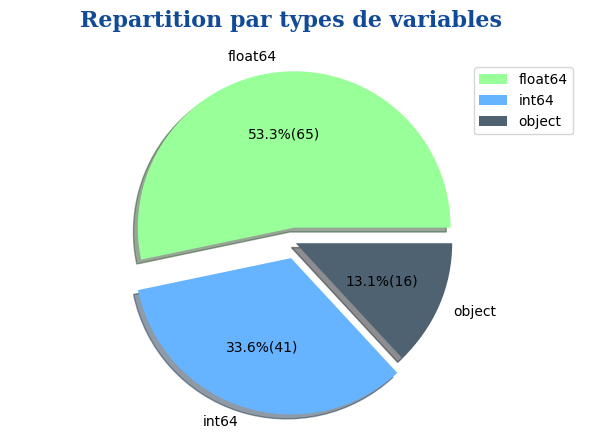

,Types de variables,Nombre
0,float64,65
1,int64,41
2,object,16


In [ ]:
# Affichage des types de variables dans la base.
repartitionTypeVar(application_train,figsize=(6, 4), graphName='RepartitionTypeVar_application_train.png')

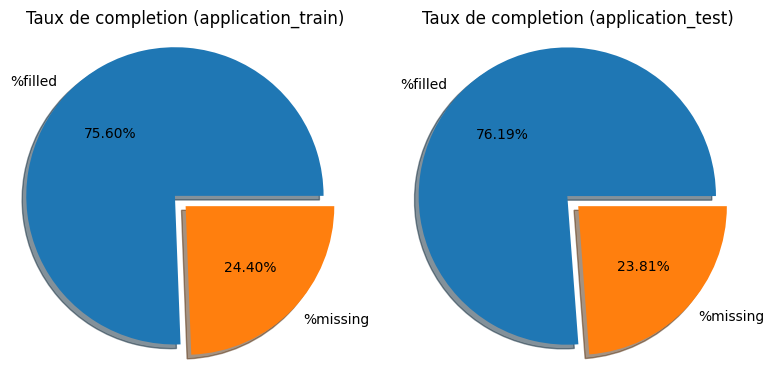

In [ ]:
# fillingRate(application_train, 'tauxCompletion_application_train.png')

import pandas as pd
import matplotlib.pyplot as plt

def fillingRate2(data1: pd.DataFrame, data2: pd.DataFrame, GRAPH_FOLDER, graphName: str = None,):
    def create_pie_chart(ax, title, labels, taux):
        explode     = (0.1, 0)
        ax.axis("equal")
        ax.pie(taux, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True)
        ax.set_title(title)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    # fig.subplots_adjust(wspace=0.5)  # Ajustez l'espace horizontal entre les sous-graphiques
    font_title      = {'fontsize': 12}
    filled1         = data1.notna().sum().sum() / (data1.shape[0] * data1.shape[1])
    missing1        = data1.isna().sum().sum() / (data1.shape[0] * data1.shape[1])
    taux1           = [filled1, missing1]
    labels1         = ["%filled", "%missing"]
    filled2         = data2.notna().sum().sum() / (data2.shape[0] * data2.shape[1])
    missing2        = data2.isna().sum().sum() / (data2.shape[0] * data2.shape[1])
    taux2           = [filled2, missing2]
    labels2         = ["%filled", "%missing"]

    create_pie_chart(ax1, f'Taux de completion ({namestr(data1)})', labels1, taux1)
    create_pie_chart(ax2, f'Taux de completion ({namestr(data2)})', labels2, taux2)

    if graphName:
        fig.savefig(os_path_join(GRAPH_FOLDER, graphName), bbox_inches='tight')
    plt.tight_layout()  # Ajuste automatiquement l'espace entre les sous-graphiques
    plt.show()
    # to_png('Taux_completion_train_test')
    plt.close()


fillingRate2(application_train, application_test, GRAPH_FOLDER, graphName='Taux_completion_train_test.png')

Description des variables de : None


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


Types de variables de : None


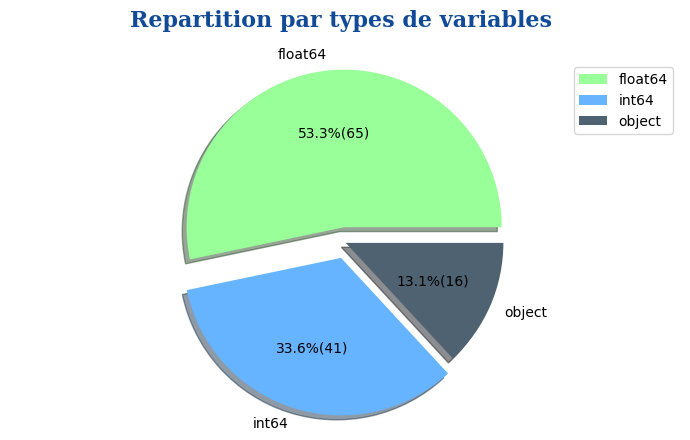

,Types de variables,Nombre
0,float64,65
1,int64,41
2,object,16


************************************************************************************************************************
Taux de complétion de : None
************************************************************************************************************************


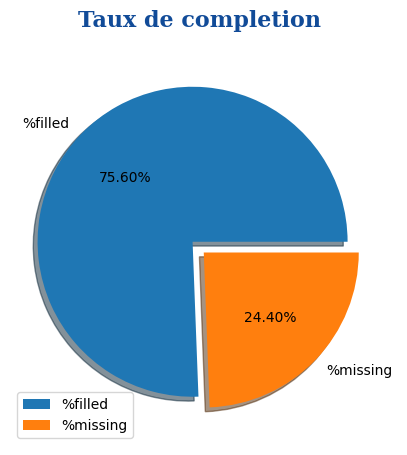

************************************************************************************************************************
Heatmap des valeurs manquantes : None
************************************************************************************************************************
************************************************************************************************************************
Réprésentation visuelle des valeurs manquantes : None
************************************************************************************************************************
Nombre de variables avec valeurs manquantes : 67


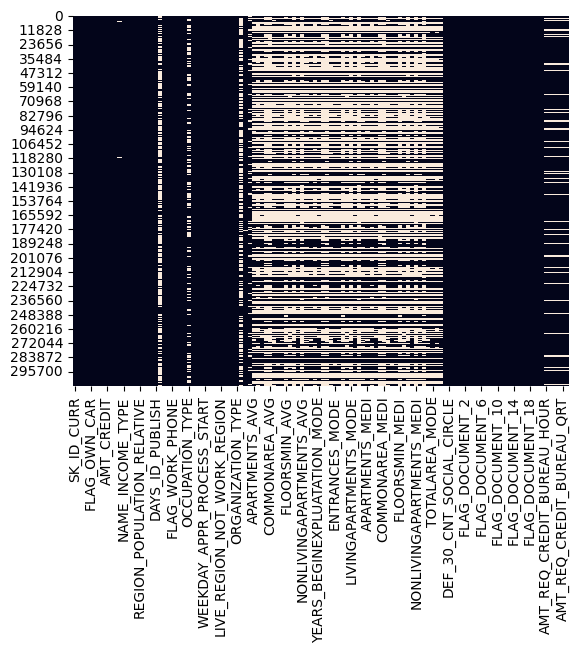

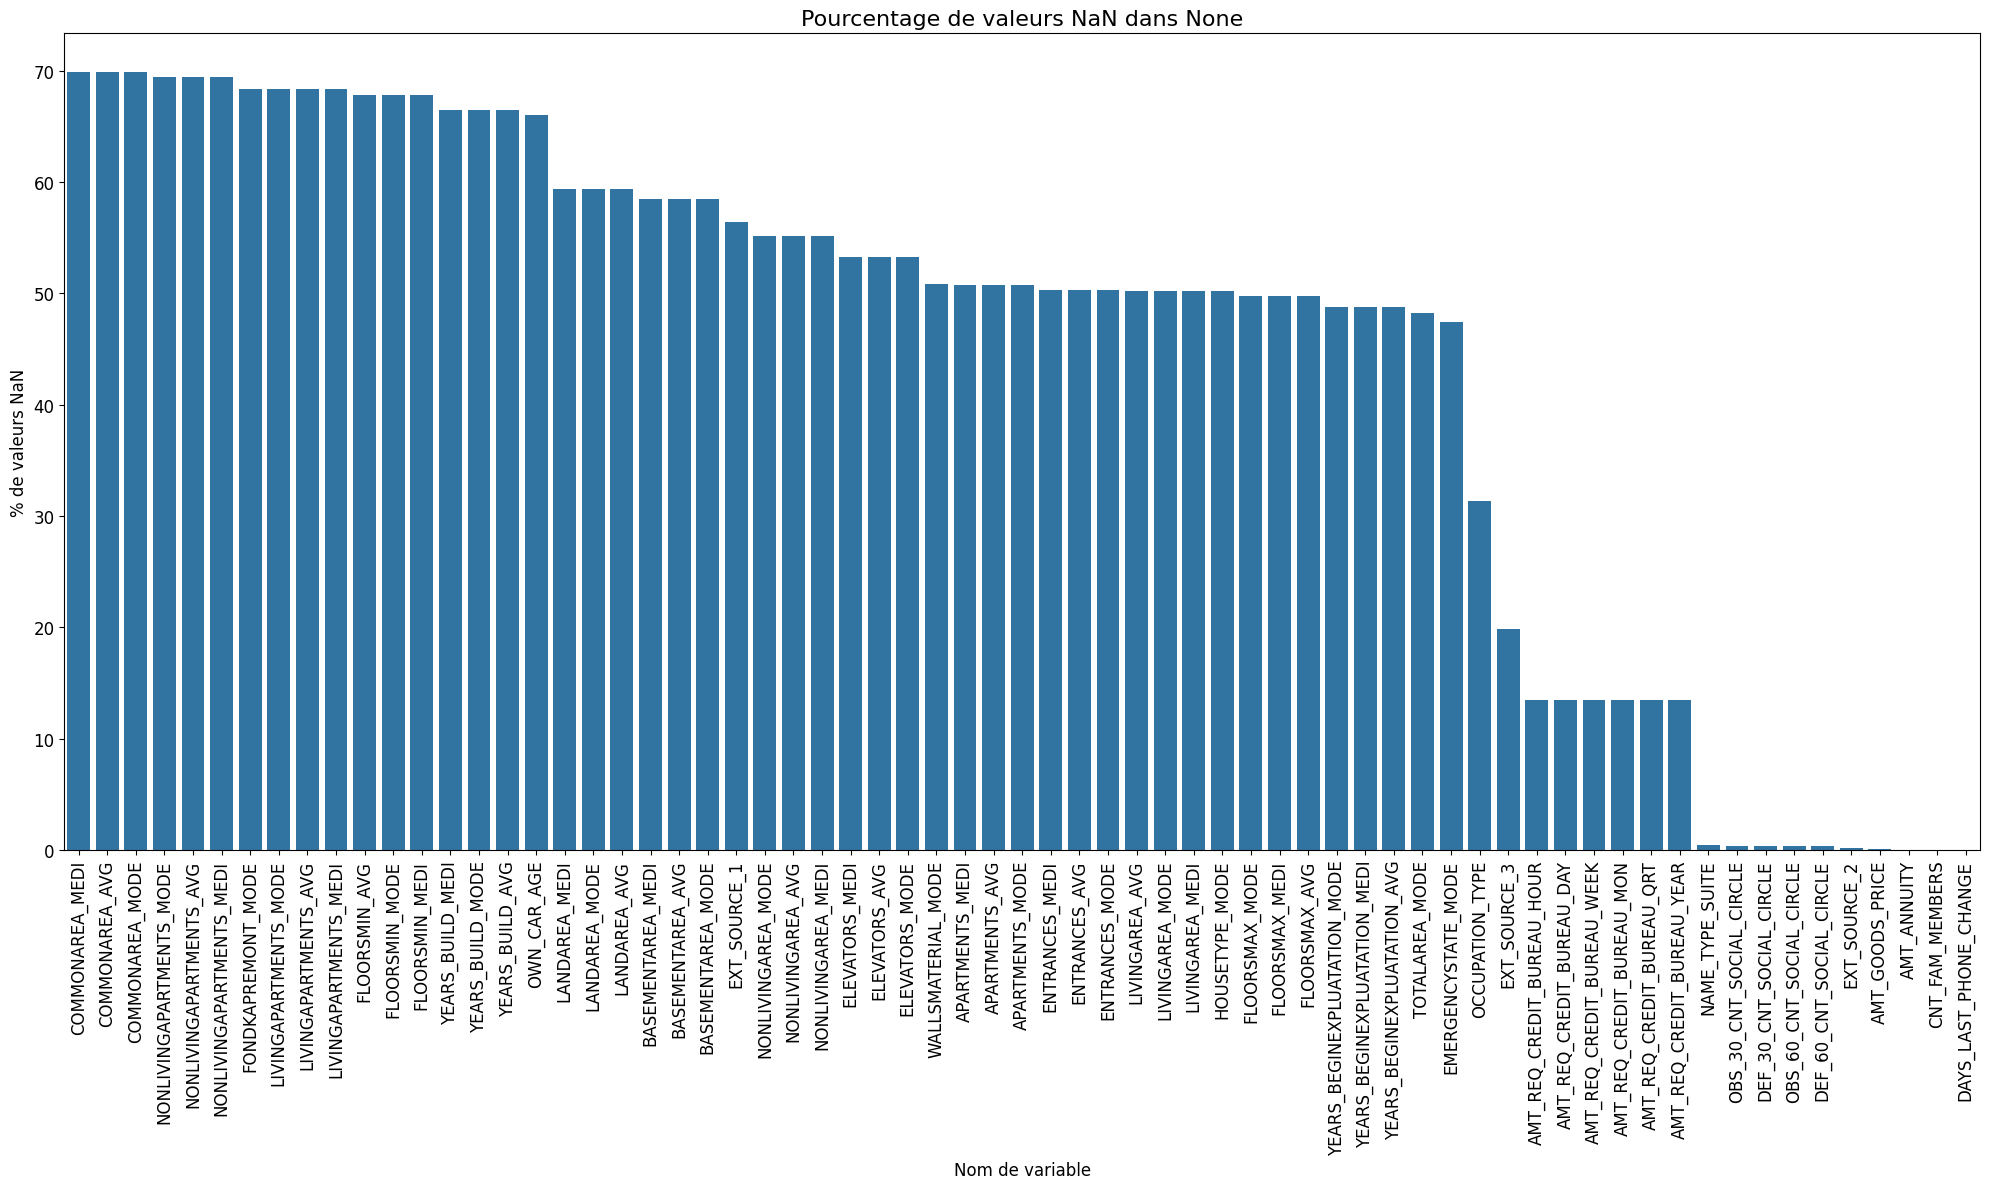

In [ ]:
exploration_dataframes(data=application_train,
                       df_cols_desc=HomeCredit_columns_description,
                       str_match='application_{train|test}.csv')

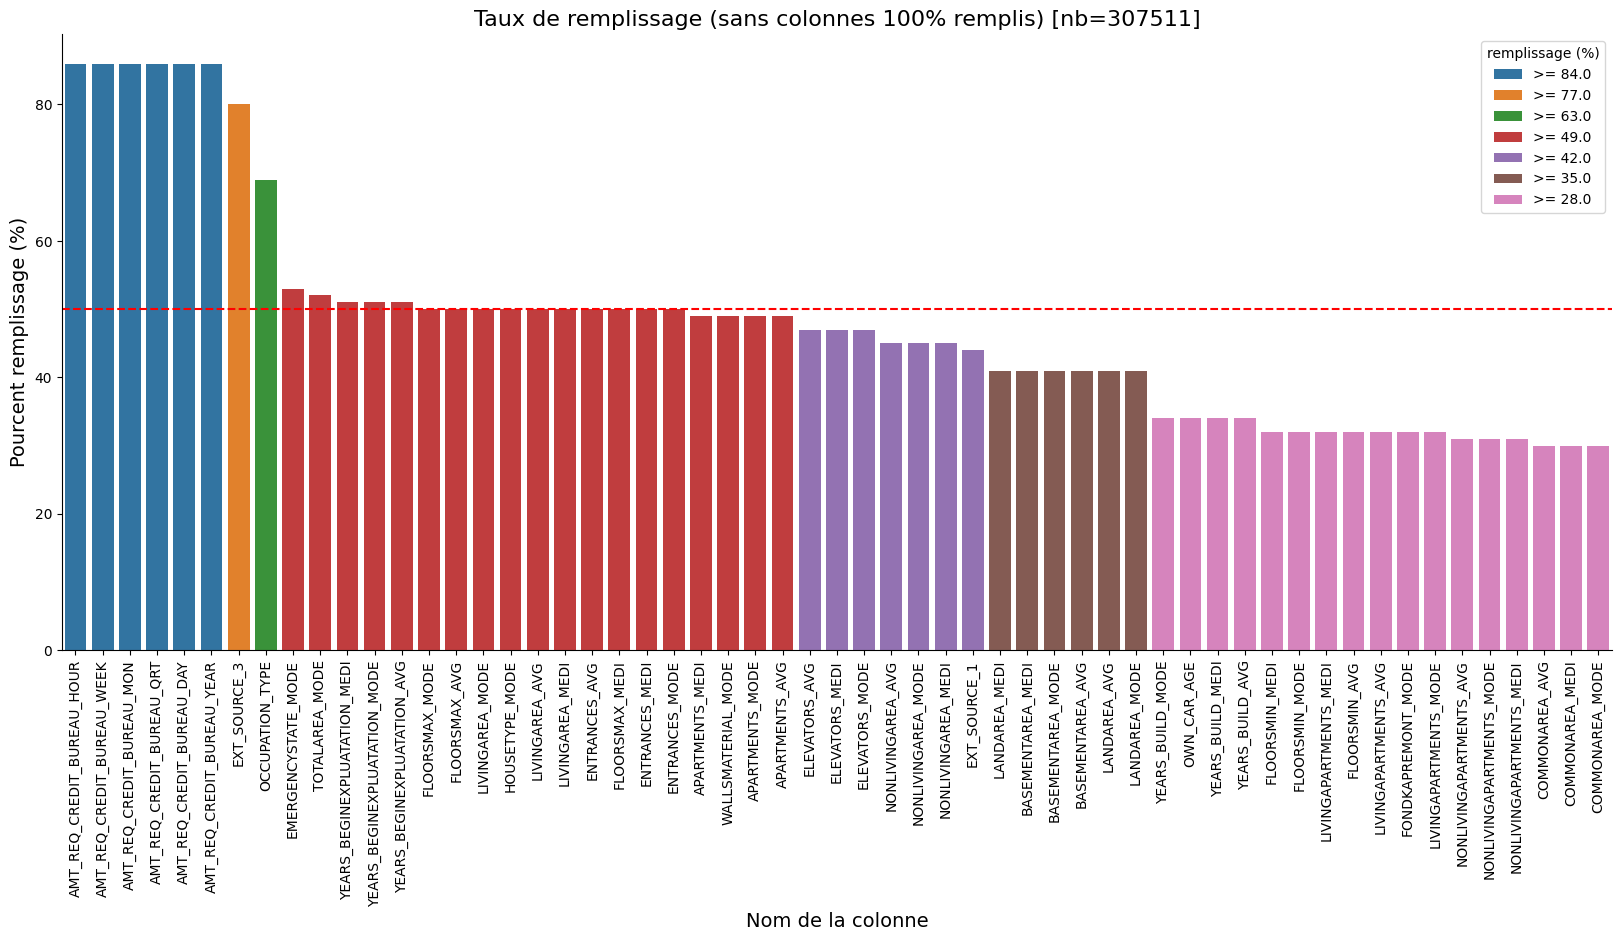

In [ ]:
plot_bar_remplissage(application_train, nb=200, titre='application_train', figsize=(20, 8),
                         vertical=False, filled_cols=False, thresh=50)

In [ ]:

def print_unique_categories(data, column_name, show_counts=False):
    '''
    Function to print the basic stats such as unique categories and their counts for categorical variables

        Inputs:
        data: DataFrame
            The DataFrame from which to print statistics
        column_name: str
            Column's name whose stats are to be printed
        show_counts: bool, default = False
            Whether to show counts of each category or not

    '''

    print('-' * 79)
    print(
        f"Les catégories uniques de la variable '{column_name}' sont :\n{data[column_name].unique()}")
    print('-' * 79)

    if show_counts:
        print(
            f"Répartition dans chaque catégorie :\n{data[column_name].value_counts()}")
        print('-' * 79)


# --------------------------------------------------------------------
# -- BARPLOT DES VARIABLES CATEGORIELLES
# --------------------------------------------------------------------


def plot_categorical_variables_bar(data, column_name, figsize=(18, 6),
                                   percentage_display=True,
                                   plot_defaulter=True, rotation=0,
                                   horizontal_adjust=0,
                                   fontsize_percent='xx-small',
                                   palette1='Set1',
                                   palette2='Set2'):
    '''
    Function to plot Categorical Variables Bar Plots

    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display

    '''

    print(
        f"Nombre de catégories uniques pour {column_name} = {len(data[column_name].unique())}")

    plt.figure(figsize=figsize, tight_layout=True)
    sns.set(style='whitegrid', font_scale=1.2)

    # plotting overall distribution of category
    plt.subplot(1, 2, 1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending=False)
    ax = sns.barplot(x=data_to_plot.index, y=data_to_plot, palette=palette1)

    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(
                p.get_x() +
                horizontal_adjust,
                p.get_height() +
                0.005 *
                total_datapoints,
                '{:1.02f}%'.format(
                    p.get_height() *
                    100 /
                    total_datapoints),
                fontsize=fontsize_percent)

    plt.xlabel(column_name, labelpad=10)
    plt.title('Toutes TARGET', pad=20, fontsize=30)
    plt.xticks(rotation=rotation, fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Nombre', fontsize=20)

    # plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts(
        ) * 100 / data[column_name].value_counts()).dropna().sort_values(ascending=False)

        plt.subplot(1, 2, 2)
        sns.barplot(x=percentage_defaulter_per_category.index,
                    y=percentage_defaulter_per_category, palette=palette2)
        plt.ylabel(
            'Pourcentage par catégorie pour les défaillants',
            fontsize=20)
        plt.xlabel(column_name, labelpad=10)
        plt.xticks(rotation=rotation, fontsize=20)
        plt.yticks(fontsize=20)
        plt.title('Défaillants seuls', pad=20, fontsize=30)

    plt.suptitle(f'Répartition de {column_name}', fontsize=40)
    plt.show()


def plot_categorical_variable_bar(data, column_name, figsize=(18, 6),
                                  percentage_display=True, rotation=0,
                                  horizontal_adjust=0,
                                  fontsize_percent='xx-small',
                                  palette1='Set1'):
    '''
    Function to plot Categorical Variables Bar Plots

    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display

    '''

    print(
        f"Nombre de catégories uniques pour {column_name} = {len(data[column_name].unique())}")

    plt.figure(figsize=figsize, tight_layout=True)
    sns.set(style='whitegrid', font_scale=1.2)

    data_to_plot = data[column_name].value_counts().sort_values(ascending=False)
    ax = sns.barplot(x=data_to_plot.index, y=data_to_plot, palette=palette1)

    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(
                p.get_x() +
                horizontal_adjust,
                p.get_height() +
                0.005 *
                total_datapoints,
                '{:1.02f}%'.format(
                    p.get_height() *
                    100 /
                    total_datapoints),
                fontsize=fontsize_percent)

    plt.xlabel(column_name, labelpad=10)
    plt.title(f'Barplot de {column_name}', pad=20, fontsize=30)
    plt.xticks(rotation=rotation, fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Nombre', fontsize=20)

    plt.show()


# --------------------------------------------------------------------
# -- PIEPLOT DES VARIABLES CATEGORIELLES
# --------------------------------------------------------------------


def plot_categorical_variables_pie(
        data,
        column_name,
        plot_defaulter=True,
        hole=0):
    '''
    Function to plot categorical variables Pie Plots
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        plot_defaulter: bool
            Whether to plot the Pie Plot for Defaulters or not
        hole: int, default = 0
            Radius of hole to be cut out from Pie Chart
    '''
    if plot_defaulter:
        cols = 2
        specs = [[{'type': 'domain'}, {'type': 'domain'}]]
        titles = ['Toutes TARGET', 'Défaillants seuls']
    else:
        cols = 1
        specs = [[{'type': 'domain'}]]
        titles = [f'Répartition de la variable {column_name}']

    values_categorical = data[column_name].value_counts()
    labels_categorical = values_categorical.index

    fig = make_subplots(rows=1, cols=cols,
                        specs=specs,
                        subplot_titles=titles)

    fig.add_trace(
        go.Pie(
            values=values_categorical,
            labels=labels_categorical,
            hole=hole,
            textinfo='percent',
            textposition='inside'),
        row=1,
        col=1)

    if plot_defaulter:
        percentage_defaulter_per_category = data[column_name][data.TARGET == 1].value_counts(
        ) * 100 / data[column_name].value_counts()
        percentage_defaulter_per_category.dropna(inplace=True)
        percentage_defaulter_per_category = percentage_defaulter_per_category.round(
            2)

        fig.add_trace(
            go.Pie(
                values=percentage_defaulter_per_category,
                labels=percentage_defaulter_per_category.index,
                hole=hole,
                textinfo='percent',
                hoverinfo='label+value'),
            row=1,
            col=2)

    fig.update_layout(title=f'Répartition de la variable {column_name}')
    # fig.update_layout(
    #     title=f'Répartition de la variable {column_name}',
    #     x=0.5,  # Position horizontale centrée
    #     y=0.5,   # Position verticale centrée
    #     xanchor='center',  # Ancrage horizontal au centre
    #     yanchor='middle'  # Ancrage vertical au milieu
    # )

    fig.show()

"Distribution_de_la_target.png"


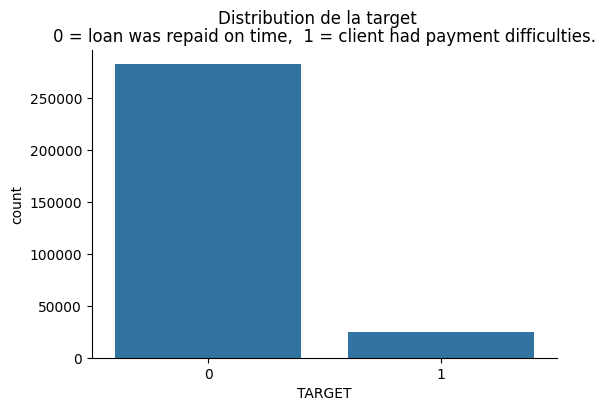

In [ ]:
plt.figure(figsize=(6, 4))  # Adjust the values as needed
sns.countplot(x='TARGET', data=application_train)
sns.despine()
plt.suptitle('Distribution de la target')
plt.title('0 = loan was repaid on time,  1 = client had payment difficulties.')
to_png()

In [ ]:
# valeurs uniques de  'NAME_CONTRACT_TYPE'
print_unique_categories(application_train, 'NAME_CONTRACT_TYPE')
plot_categorical_variables_pie(application_train,'NAME_CONTRACT_TYPE',hole=0.5)

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_CONTRACT_TYPE' sont :
['Cash loans' 'Revolving loans']
-------------------------------------------------------------------------------


In [ ]:
plot_categorical_variables_pie(application_train,'NAME_CONTRACT_TYPE',hole=0.5)

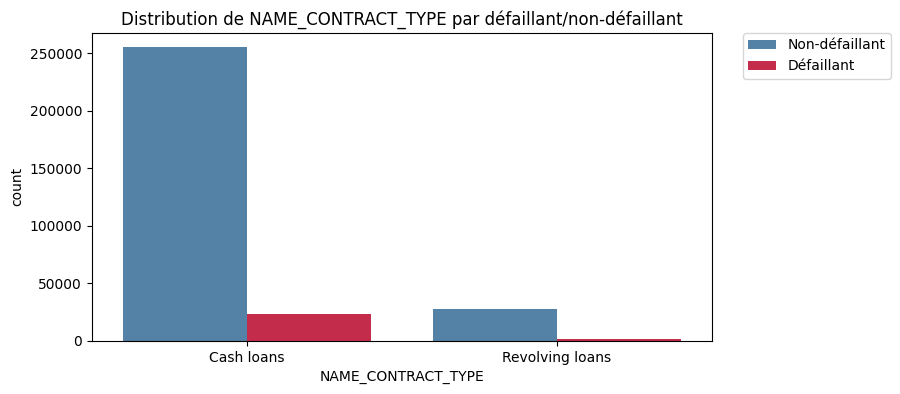

In [ ]:
def plot_barplot_comp_target(dataframe, feature_name,
                             labels=['Non-défaillant', 'Défaillant'],
                             palette=['SteelBlue', 'crimson'],
                             rotation=0):
    '''
    Barplot de comparaison des catégories par target.
    Parameters
    ----------
    dataframe : dataframe, obligatoire.
    feature_name : variable, obligatoire.
    Returns
    -------
    None.
    '''
    plt.figure(figsize=(8,4))
    sns.countplot(x=dataframe[feature_name], hue=dataframe.TARGET,
                  data=dataframe, palette=palette)
    plt.xticks(rotation=rotation)
    plt.title(f'Distribution de {feature_name} par défaillant/non-défaillant')
    plt.legend(labels=labels,
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

# Distribution par défaillants/non-défaillants
plot_barplot_comp_target(application_train, 'NAME_CONTRACT_TYPE')

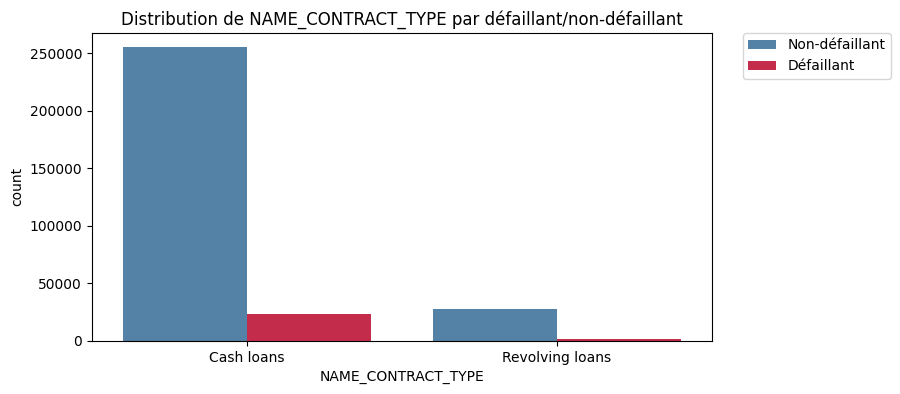

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barplot_comp_target_percent(dataframe, feature_name,
                             labels=['Non-défaillant', 'Défaillant'],
                             palette=['SteelBlue', 'crimson'],
                             rotation=0):
    '''
    Barplot de comparaison des catégories par target.
    Parameters
    ----------
    dataframe : dataframe, obligatoire.
    feature_name : variable, obligatoire.
    Returns
    -------
    None.
    '''
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=dataframe[feature_name], hue=dataframe.TARGET,
                  data=dataframe, palette=palette)

    plt.xticks(rotation=rotation)
    plt.title(f'Distribution de {feature_name} par défaillant/non-défaillant')
    plt.legend(labels=labels,
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Ajoutez les pourcentages au-dessus des barres
    total_counts = len(dataframe)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,  # Ajustez la hauteur de l'annotation si nécessaire
                f'{100 * height / total_counts:.2f}%', ha="center")

    plt.show()

# Distribution par défaillants/non-défaillants
plot_barplot_comp_target(application_train, 'NAME_CONTRACT_TYPE')


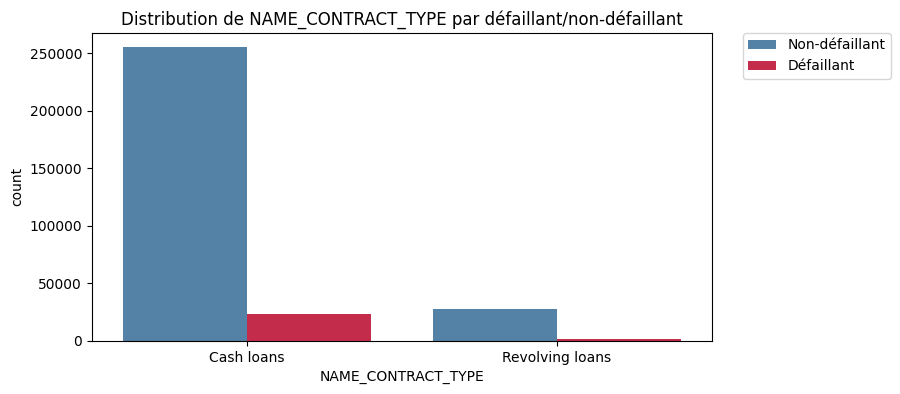

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barplot_comp_target_percent(dataframe, feature_name,
                             labels   = ['Non-défaillant', 'Défaillant'],
                             palette  = ['SteelBlue', 'crimson'],
                             rotation = 0):
    '''
    Barplot de comparaison des catégories par target.
    Parameters
    ----------
    dataframe : dataframe, obligatoire.
    feature_name : variable, obligatoire.
    Returns
    -------
    None.
    '''
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=dataframe[feature_name], hue=dataframe['TARGET'],
                  data=dataframe, palette=palette)

    plt.xticks(rotation=rotation)
    plt.title(f'Distribution de {feature_name} par défaillant/non-défaillant')
    plt.legend(labels=labels,
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Ajoutez les pourcentages au-dessus des barres
    total_counts = len(dataframe)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,  # Ajustez la hauteur de l'annotation si nécessaire
                f'{100 * height / total_counts:.2f}%', ha="center")

    plt.show()

# Distribution par défaillants/non-défaillants
plot_barplot_comp_target(application_train, 'NAME_CONTRACT_TYPE')

In [ ]:
# valeurs uniques de 'CODE_GENDER'
print_unique_categories(application_train, 'CODE_GENDER', show_counts=True)
plot_categorical_variables_pie(application_train, 'CODE_GENDER', hole=0.5)

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'CODE_GENDER' sont :
['M' 'F' 'XNA']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
-------------------------------------------------------------------------------


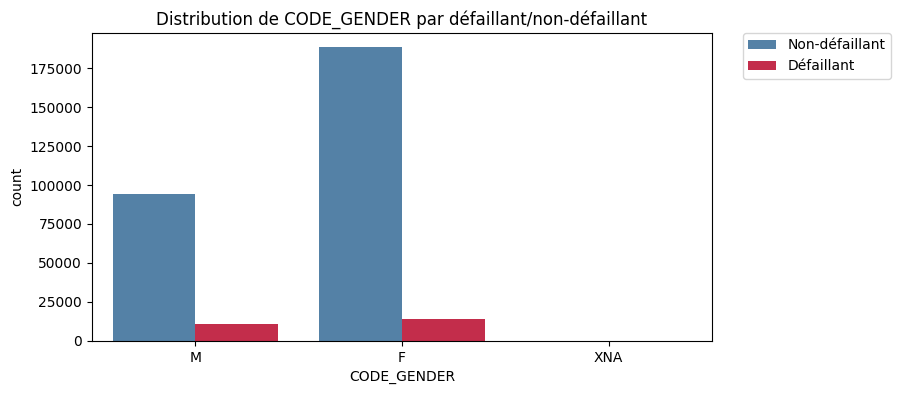

In [ ]:
# Distribution selon le genre
plot_barplot_comp_target(application_train, 'CODE_GENDER')

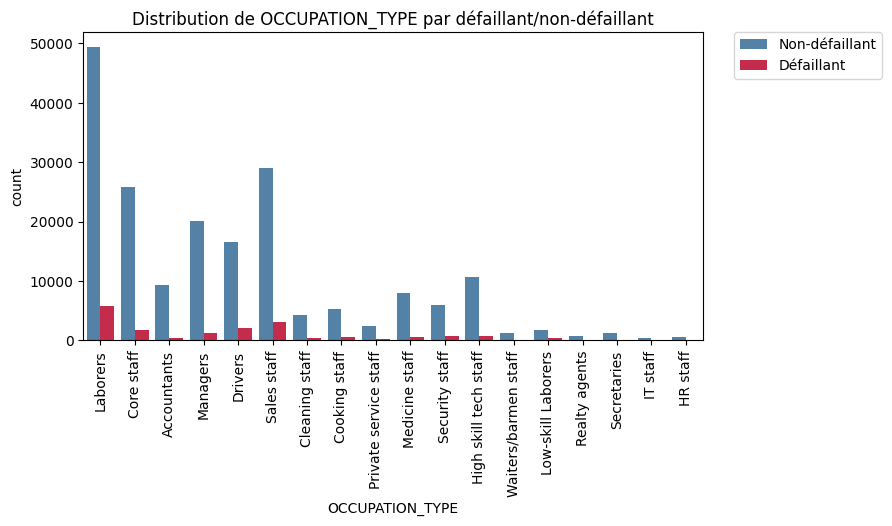

In [ ]:
plot_barplot_comp_target(application_train, 'OCCUPATION_TYPE', rotation=90)

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



"Analyse_de_la_target.png"


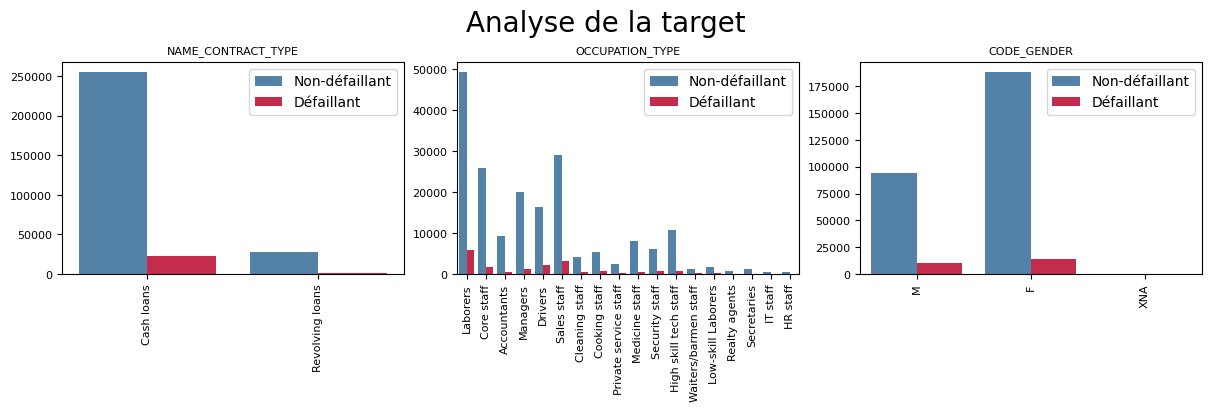

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

def plot_barplot_comp_target(dataframe, feature_name, ax, target='TARGET',
                             labels=['Non-défaillant', 'Défaillant'],
                             palette=['SteelBlue', 'crimson'], rotation=90):
    '''
    Barplot de comparaison des catégories par target.
    Parameters
    ----------
    dataframe : dataframe, obligatoire.
    feature_name : variable, obligatoire.
    Returns
    -------
    None.
    '''
    sns.countplot(x=feature_name, hue=target, data=dataframe, palette=palette, ax = ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.set_title(f'{feature_name}', fontsize=8)
    # Fixer la taille des étiquettes de l'axe y et x
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    # Supprimez les étiquettes de l'axe des y
    ax.set_xlabel('')
    ax.set_ylabel('')
    # Placer la légende au meilleur endroit
    ax.legend(labels=labels, loc='best', prop={'size': 10})

# Créer une liste de variables à croiser avec la cible (target)
variables_to_plot = ['NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE', 'CODE_GENDER']  # Ajoutez vos variables ici

# nrows = 3  # Nombre de lignes dans la grille
# ncols = 3  # Nombre de colonnes dans la grille

# Créer une grille de graphiques en croisant chaque variable avec la cible
def graphic_analysis_target(dataframe, target='TARGET', variables_to_plot=None, ncols=3,
                            title="Analyse de la target"):
    if not variables_to_plot:
        variables_to_plot = list(dataframe.select_dtypes(object).columns)

    nplot = len(variables_to_plot)
    nrows = int(np.ceil(nplot/ ncols))  # Calcul du nombre de lignes en fonction du nombre de colonnes et du nombre de variables

    fig = plt.figure(figsize=(ncols*4, nrows*4), constrained_layout=True)
    axs = fig.subplots(nrows, ncols)
    # plt.subplots_adjust(hspace=0.5, wspace=0.2)  # Ajustez ces valeurs selon vos préférences

    axs = trim_axs(axs, nplot)
    # plt.subplots_adjust(hspace=1.0, wspace=0.2)  # Ajuster l'espacement vertical entre les graphiques

    for ax, var in zip(axs, variables_to_plot):
        plot_barplot_comp_target(dataframe, var, ax=ax, target=target, rotation=90)

    # fig.suptitle('Analyse de la target', ha="center", fontsize=12)
    #plt.tight_layout()

    # Ajuster l'espace entre le haut du graphique et le titre
    # plt.subplots_adjust(top=0.2)

    fig.suptitle(title, fontsize=20) # y=1.1,

    # plt.title(title,  fontsize=20,  ha="center")
    # fig.text(0.5, 1.1, r"Analyse de la target", ha="center", fontsize=20)
    to_png()
    plt.show()

# Appeler la fonction pour afficher les graphiques
graphic_analysis_target(application_train,  target='TARGET',
                        variables_to_plot=variables_to_plot)

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-49-dd6cd0caacba>:24: UserWarning:

FixedFormatter should only be used together wi

"Analyse_de_la_target_ensemble_des_variables.png"


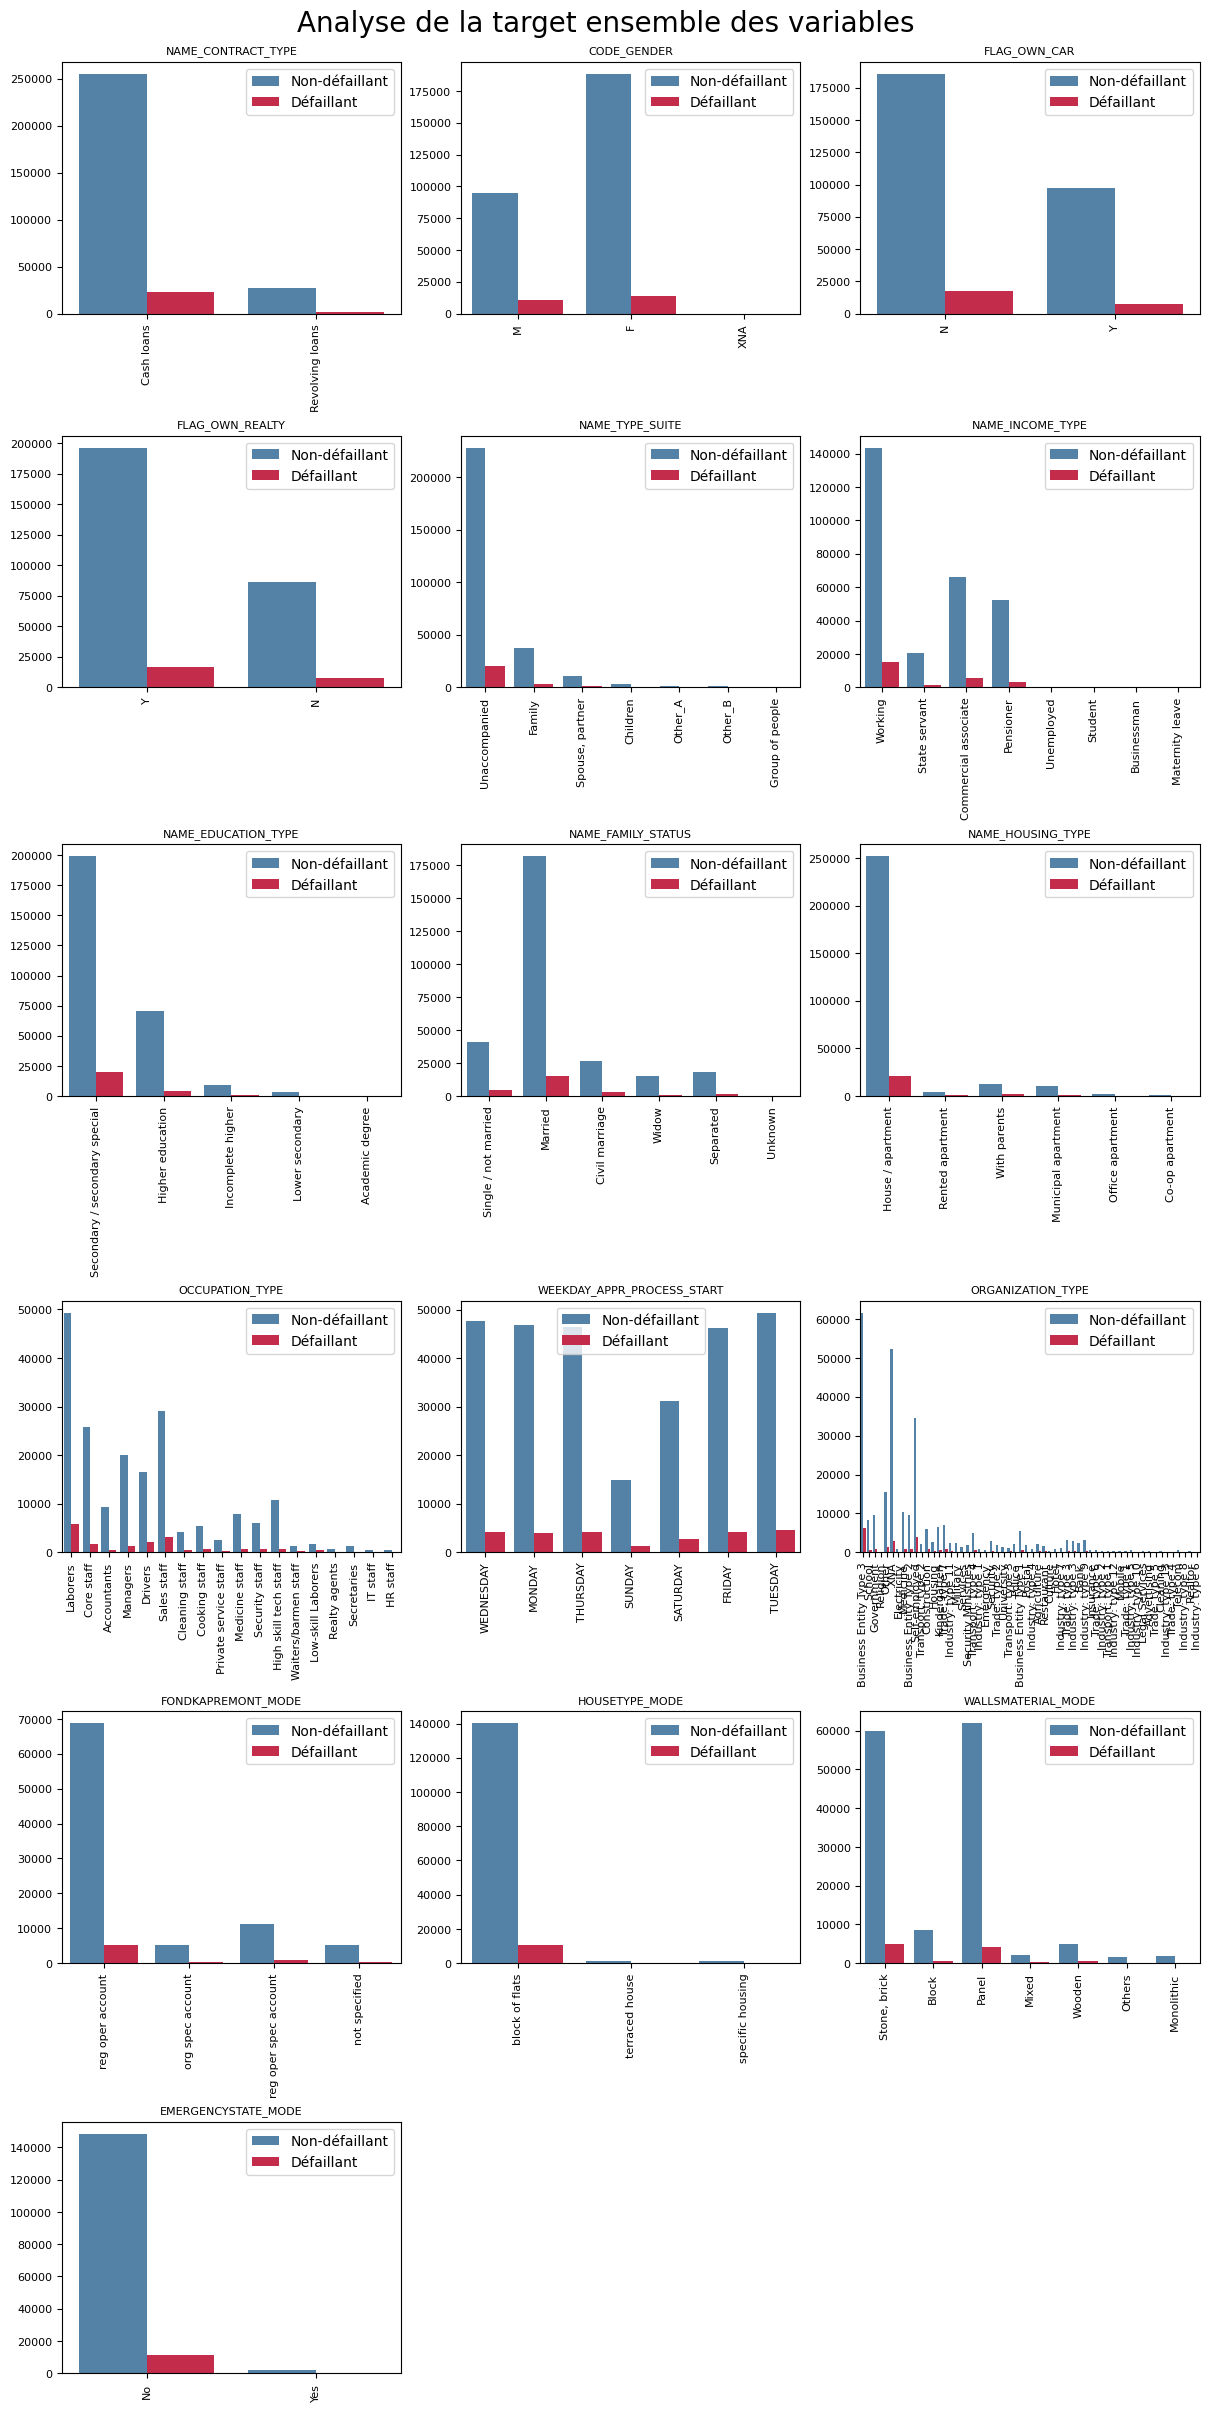

In [ ]:
graphic_analysis_target(application_train, target='TARGET',
                        title="Analyse de la target ensemble des variables")

In [ ]:
def bar_plot(df, variable, figsize=(6, 4)):
    counts = df[variable].value_counts(normalize=True)

    fig, ax = plt.subplots(figsize=figsize)
    bars = plt.bar(counts.index, counts.values)

    plt.ylabel('Proportion')
    plt.ylim(0, 1.1)
    plt.title('Distribution of ' + str(variable))

    # Ajoutez une étiquette au survol de la souris pour chaque barre
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points de décalage vers le haut
                     textcoords='offset points', ha='center', va='bottom')

    plt.xticks(rotation=45)  # Fait pivoter les étiquettes de l'axe x pour plus de lisibilité
    plt.show()

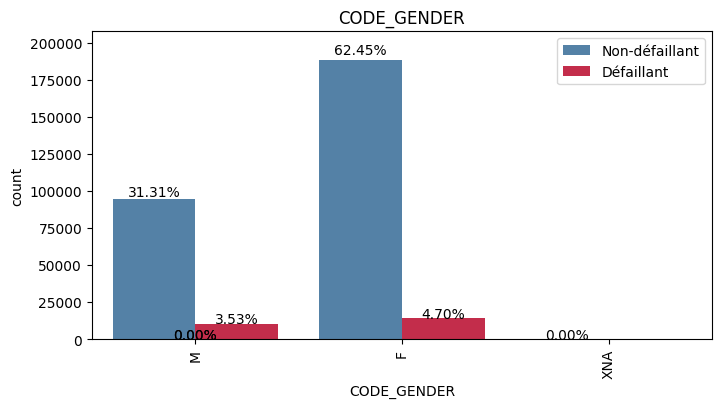

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barplot_comp_target_percent(dataframe, feature_name,
                             labels=['Non-défaillant', 'Défaillant'],
                             palette=['SteelBlue', 'crimson'],
                             rotation=90):
    '''
    Barplot de comparaison des catégories par target.
    Parameters
    ----------
    dataframe : dataframe, obligatoire.
    feature_name : variable, obligatoire.
    Returns
    -------
    None.
    '''
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=dataframe[feature_name], hue=dataframe.TARGET,
                  data=dataframe, palette=palette)
    # Augmentation de la taille de l'axe des y de 5%
    y_scale_factor = 1.05
    ax.set_ylim(0, ax.get_ylim()[1] * y_scale_factor)

    plt.xticks(rotation=rotation)
    plt.title(f'{feature_name}')
    plt.legend(labels=labels, loc='best')

    # Ajoutez les pourcentages au-dessus des barres
    total_counts = len(dataframe)
    for p in ax.patches:
        height = 1.02*p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height +0.5,  # Ajustez la hauteur de l'annotation si nécessaire
                f'{100 * height / total_counts:.2f}%', ha="center")

    plt.show()

plot_barplot_comp_target_percent(application_train,  'CODE_GENDER')

TARGET,0,1
CODE_GENDER,,
F,93.000672,6.999328
M,89.858080,10.141920
XNA,100.000000,0.000000


<ipython-input-53-97cb14ec879c>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-53-97cb14ec879c>:25: UserWarning:


The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.



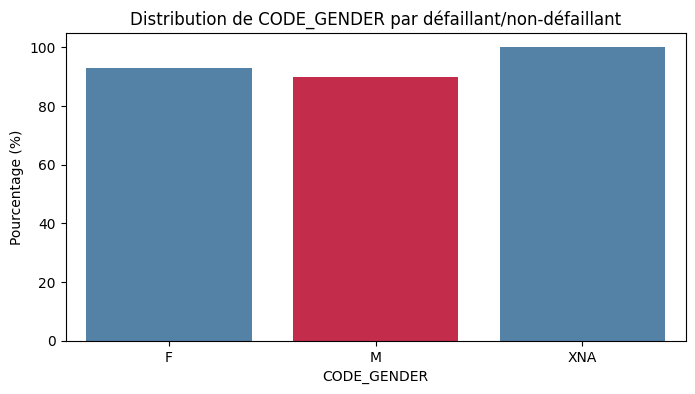

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_barplot_comp_target_percent(dataframe, feature_name,
                             labels=['Non-défaillant', 'Défaillant'],
                             palette=['SteelBlue', 'crimson'],
                             rotation=0):
    '''
    Barplot de comparaison des catégories par target.
    Parameters
    ----------
    dataframe : dataframe, obligatoire.
    feature_name : variable, obligatoire.
    Returns
    -------
    None.
    '''
    plt.figure(figsize=(8, 4))

    # Regroupez les données par feature_name et TARGET et calculez les pourcentages
    grouped_data = dataframe.groupby([feature_name, 'TARGET']).size().unstack(fill_value=0)
    percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
    display(percentages)
    ax = sns.barplot(x=percentages.index, y=percentages.iloc[:,0], palette=palette)

    plt.xticks(rotation=rotation)
    plt.title(f'Distribution de {feature_name} par défaillant/non-défaillant')
    plt.ylabel('Pourcentage (%)')

    plt.show()

# Exemple d'utilisation :
plot_barplot_comp_target_percent(application_train,  'CODE_GENDER')


"Payment_defaults_by_category.png"


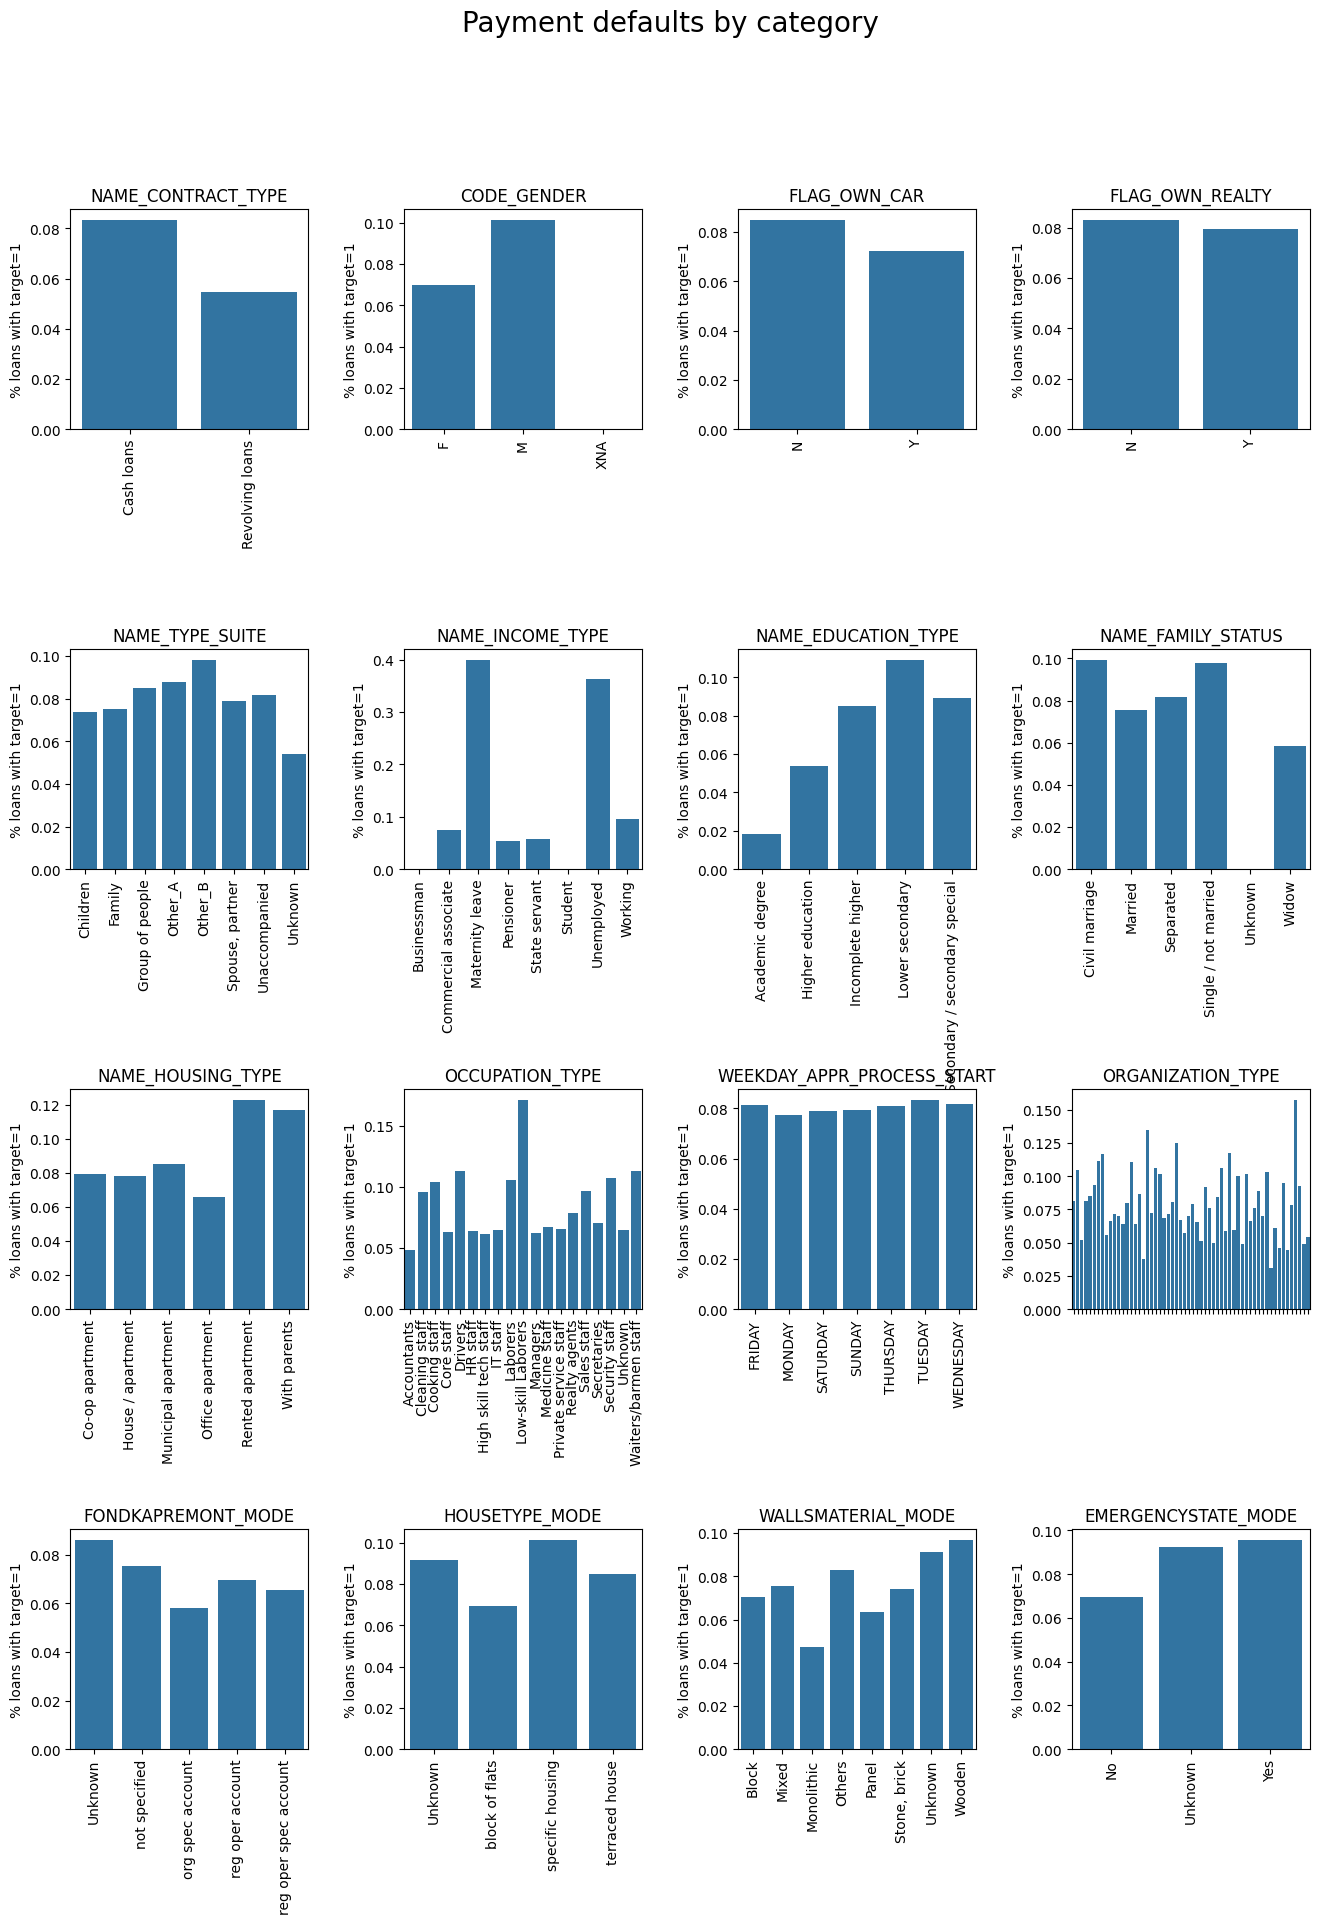

In [ ]:
def plot_loan_defaults_by_categ(df, title='Payment defaults by category'):
    categorical_cols = list(df.select_dtypes(object).columns)
    n_cols = min(4, len(categorical_cols))
    n_rows = len(categorical_cols) // n_cols + \
        (len(categorical_cols) % n_cols > 0)
    fig = plt.figure(figsize=(n_cols*4, n_rows*5))

    for n, feature in enumerate(categorical_cols):
        ax = plt.subplot(n_rows, n_cols, n + 1)
        # Calculate the percentage of target=1 per category value
        cat_perc = df[[feature, 'TARGET']].fillna(
            "Unknown").groupby([feature], as_index=False).mean()
        # cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
        cat_perc.sort_values(by=feature, inplace=True)
        sns.barplot(ax=ax, x=feature, y='TARGET',
                    order=cat_perc[feature], data=cat_perc)
        plt.xlabel('')
        plt.ylabel('% loans with target=1')
        plt.title(feature)
        if len(cat_perc) > 20:
            ax.xaxis.set_ticklabels([])
        plt.xticks(rotation=90)

    plt.subplots_adjust(hspace=1.0, wspace=0.4)
    fig.suptitle(title, fontsize=20) # y=1.1,

font_title_g = {'family': 'serif', 'color': '#114b98', 'weight': 'bold', 'size': 40, }
plot_loan_defaults_by_categ(application_train)
to_png()

<ipython-input-55-5e4a5ff37c55>:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-55-5e4a5ff37c55>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-55-5e4a5ff37c55>:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

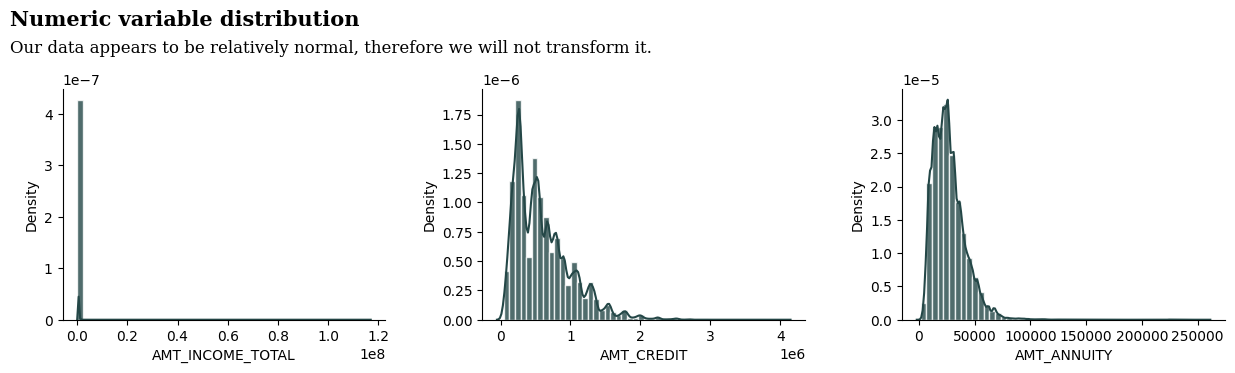

In [ ]:
import matplotlib.gridspec as gridspec
numeric_cols = application_train.select_dtypes(include='float64').columns
df= application_train
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15, 3))


fig.text(0.09, 1.09, 'Numeric variable distribution', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1, 'Our data appears to be relatively normal, therefore we will not transform it.', fontsize=12, fontweight='light', fontfamily='serif')


ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.distplot(df[numeric_cols[0]],color='#244747', hist_kws=dict(edgecolor="white", linewidth=1, alpha=0.8))

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.distplot(df[numeric_cols[1]],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3 = sns.distplot(df[numeric_cols[2]],color='#244747',hist_kws=dict(edgecolor="white", linewidth=1,alpha=0.8))

sns.despine()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots


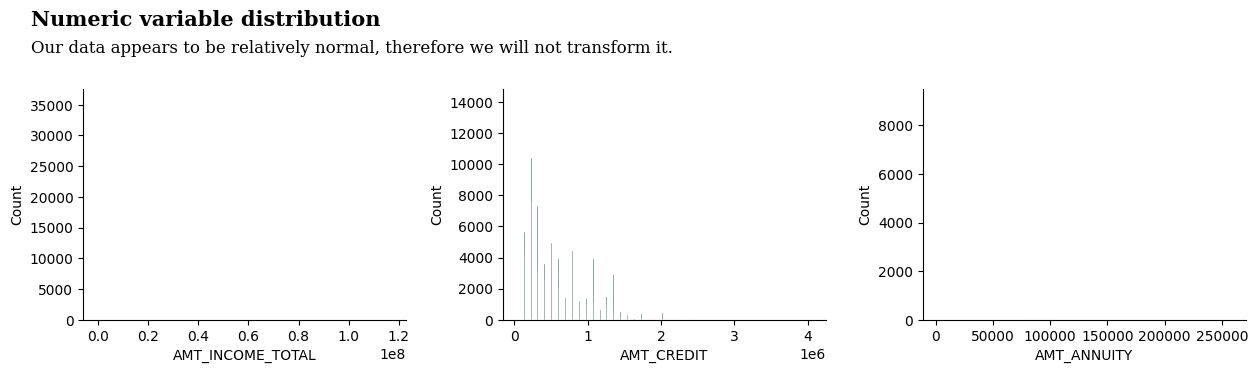

In [ ]:
import matplotlib.gridspec as gridspec
numeric_cols = application_train.select_dtypes(include='float64').columns
df= application_train

# FutureWarning: is_categorical_dtype is deprecated...
from pandas.api.types import CategoricalDtype
is_categorical = isinstance(df[numeric_cols[0]].dtype, CategoricalDtype)

# FutureWarning: use_inf_as_na option is deprecated...
df.replace([np.inf, -np.inf], np.nan, inplace=True)

gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(15, 3))

fig.text(0.09, 1.09, 'Numeric variable distribution', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1, 'Our data appears to be relatively normal, therefore we will not transform it.', fontsize=12, fontweight='light', fontfamily='serif')


ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
sns.histplot(df[numeric_cols[0]], color='#244747', ax = ax1, edgecolor="white", linewidth=1, alpha=0.8)
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
sns.histplot(df[numeric_cols[1]],color='#244747', ax = ax2, edgecolor="white", linewidth=1, alpha=0.8)
ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
sns.histplot(df[numeric_cols[2]],color='#244747', ax = ax3, edgecolor="white", linewidth=1, alpha=0.8)
sns.despine()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) # useful for adjusting space between subplots

In [ ]:
# Histplot for eac feature
import math
def plot_draw(df, cols=5, width=10, height=10, hspace=0.2, wspace=0.5):
    """Ploting the individual feature histplot"""
    # plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == 'object':
            g = sns.countplot(y=column, data=df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.displot(df[column])
            plt.xticks(rotation=25)

# plot_draw(application_train, cols=3, width=20, height=10, hspace=0.45, wspace=0.5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_variable_distribution(dataframe, ncols=4):
    """
    Affiche la distribution des variables numériques dans un ensemble de subplots.

    dataframe (DataFrame) : Le DataFrame contenant les variables numériques.
    ncols (int) : Le nombre de colonnes dans la grille de subplots.
    """

    numeric_columns = dataframe.select_dtypes(include=np.number).columns

    # Calcul du nombre de lignes en fonction du nombre de colonnes
    nrows = (len(numeric_columns) + ncols - 1) // ncols

    # Création de la grille de subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*5))
    axes = axes.ravel()

    # Itération à travers les colonnes numériques et création des graphiques de distribution
    for i, col in enumerate(numeric_columns):
        sns.histplot(dataframe[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution de {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Suppression des subplots non utilisés
    for j in range(len(numeric_columns), nrows * ncols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [ ]:
numeric_columns = application_train.select_dtypes(include=np.number).columns
print(len(numeric_columns))

106


In [ ]:
# Exemple d'utilisation
plot_numeric_variable_distribution(application_train, ncols = 4)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [ ]:
##import sys
##sys.path.append('/content/drive/MyDrive/OC-Projet-7')

##from EDA_Kernel_Kaggle import *

In [ ]:
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# One-hot encoding for categorical columns with get_dummies

def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [ ]:
# Preprocess application_train.csv and application_test.csv

def application_train_test(num_rows=None, nan_as_category=False):
    # Read data and merge
    df = pd.read_csv(f'{DATA_FOLDER}/application_train.csv', nrows=num_rows, low_memory=True)
    test_df = pd.read_csv(f'{DATA_FOLDER}/application_test.csv', nrows=num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    # df = df.append(test_df).reset_index()
    df = pd.concat([df,test_df], ignore_index=True)
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)

    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

In [ ]:
DATA_FOLDER

'/content/drive/MyDrive/dossier_proje7/OC-Projet-7/bases'

In [ ]:
path = DATA_FOLDER

In [ ]:
# Preprocessing de bureau.csv et bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv(os.path.join(path, 'bureau.csv'), nrows = num_rows)
    bb = pd.read_csv(os.path.join(path, 'bureau_balance.csv'), nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

    # Bureau balance: Aggréger et fusionner avec bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()

    # Calcul de plusieurs features numériques sur bureau.csv
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Identification des categorical features de bureau.csv et bureau_balance.csv
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']

    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: credits actifs - en utilisant uniquement les aggrégations numériques
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: credits clos - en utilisant uniquement les aggrégations numériques
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

In [ ]:
# Preprocessing de previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv(os.path.join(path, 'previous_application.csv'), nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Remplacement des valeurs pour les jours supérieurs à 365.243
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Ajout d'un indicateur: valeur demandée / valeur percue pourcentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Calcul de plusieurs features numériques sur previous_applications.csv
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Gestion des categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Applications approuvées- en ne prenant que les numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Applications refusées- en ne prenant que les numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

In [ ]:
# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv(os.path.join(path, 'POS_CASH_balance.csv'), nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']

    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Nombre de comptes
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

In [ ]:
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv(os.path.join(path, 'installments_payments.csv'), nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Pourcentage et difference entre montant payé et montant de l'échéance
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Nombre de jours de retard (Past Due) ou d'avance (Before Due) par rapport à la date d'échéance
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: aggrégats
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Nombre de comptes avec échéancier
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

In [ ]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv(os.path.join(path, 'credit_card_balance.csv'), nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # Aggrégats génériques
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Nombre de lignes de cartes de crédit
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

In [ ]:
# Fonction principale
def main(debug = False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    return df

In [ ]:
df=main(debug=False)

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 38s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 29s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 15s
Installments payments df shape: (339587, 26)
Process installments payments - done in 35s
Credit card balance df shape: (103446, 141)
Process credit card balance - done in 18s


In [ ]:
def reduce_memory(df):
    """Reduce memory usage of a dataframe by setting data types. """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Initial df memory usage is {:.2f} MB for {} columns'
          .format(start_mem, len(df.columns)))

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type != object:
            cmin = df[col].min()
            cmax = df[col].max()
            if str(col_type)[:3] == 'int':
                if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif cmin > np.iinfo(np.int64).min and cmax < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    memory_reduction = 100 * (start_mem - end_mem) / start_mem
    print('Final memory usage is: {:.2f} MB - decreased by {:.1f}%'.format(end_mem, memory_reduction))
    return df

In [ ]:
df=reduce_memory(df)

Initial df memory usage is 1852.64 MB for 797 columns
Final memory usage is: 650.62 MB - decreased by 64.9%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356251 entries, 0 to 356254
Columns: 797 entries, SK_ID_CURR to CC_COUNT
dtypes: float16(586), float32(166), float64(3), int16(2), int32(1), int8(39)
memory usage: 650.6 MB


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.median())

In [ ]:
train = pd.read_csv(os.path.join(path, 'application_train.csv'))
test = pd.read_csv(os.path.join(path, 'application_test.csv'))

In [ ]:
data = df[df['SK_ID_CURR'].isin(train.SK_ID_CURR)]
data_test = df[df['SK_ID_CURR'].isin(test.SK_ID_CURR)]

In [ ]:
# Export pour réutilisation
data.to_csv("/content/drive/MyDrive/OC-Projet-7/out_put/data.csv")
data_test.to_csv("/content/drive/MyDrive/OC-Projet-7/out_put/data_test.csv")